# Exercises Sheet 4 Search - Genetic Algorithms

(num_attempts, time) for str_size=4: ([15], [0.00017547607421875])
(num_attempts, time) for str_size=6: ([2], [2.193450927734375e-05])
(num_attempts, time) for str_size=8: ([219], [0.0021653175354003906])
Initial Pattern: [0, 0], Wanted Pattern: [1, 1]
Final Pattern: [1, 1]
Iterations: 1
Initial Pattern: [1, 1, 1, 0], Wanted Pattern: [1, 0, 0, 1]
Final Pattern: [1, 0, 0, 1]
Iterations: 54
Initial Pattern: [0, 1, 1, 1, 1], Wanted Pattern: [0, 0, 1, 1, 0]
Final Pattern: [0, 0, 1, 1, 0]
Iterations: 97
Initial Pattern: [1, 0, 1, 1, 1, 0], Wanted Pattern: [1, 0, 1, 1, 0, 1]
Final Pattern: [1, 0, 1, 1, 0, 1]
Iterations: 19
Initial Pattern: [1, 0, 0, 0, 1, 1, 1], Wanted Pattern: [0, 0, 1, 1, 0, 0, 1]
Final Pattern: [0, 0, 1, 1, 0, 0, 1]
Iterations: 70
[([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], 0.8125), ([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], 0.75), ([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], 0.75), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], 0.6875), ([0, 0, 

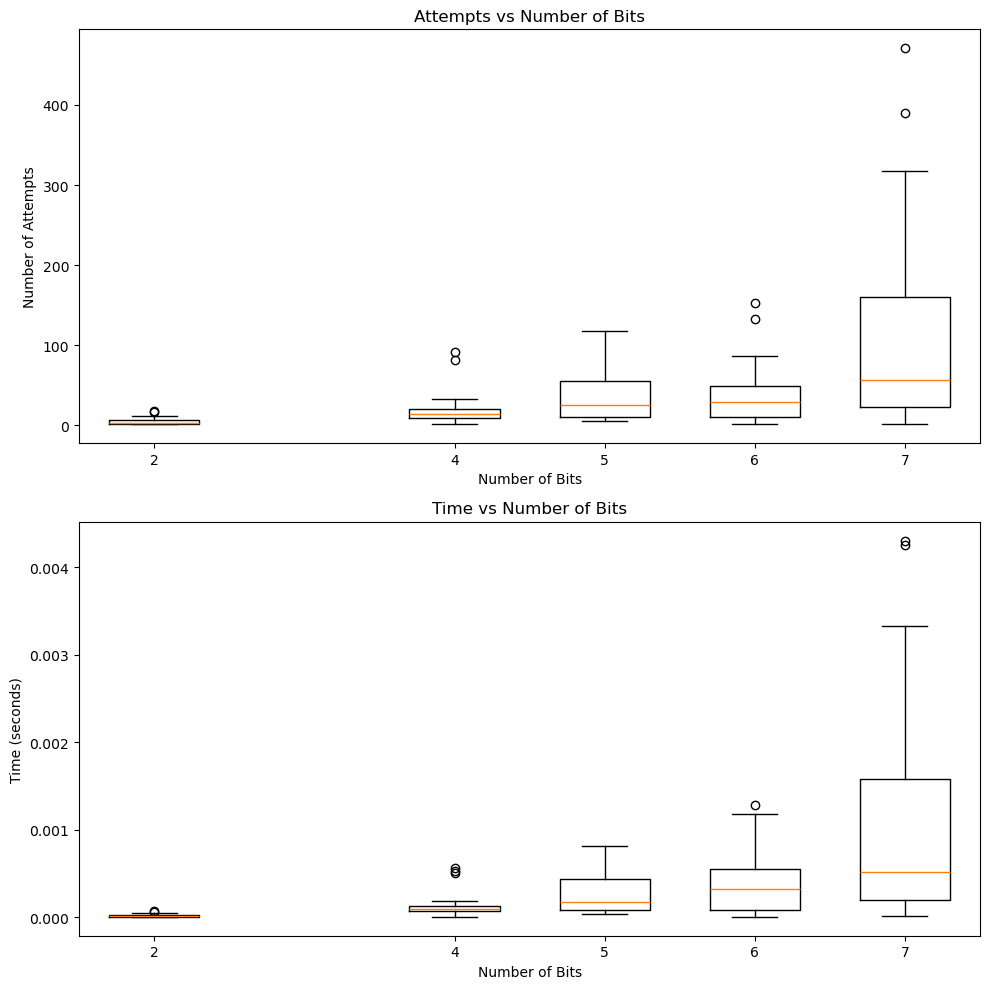

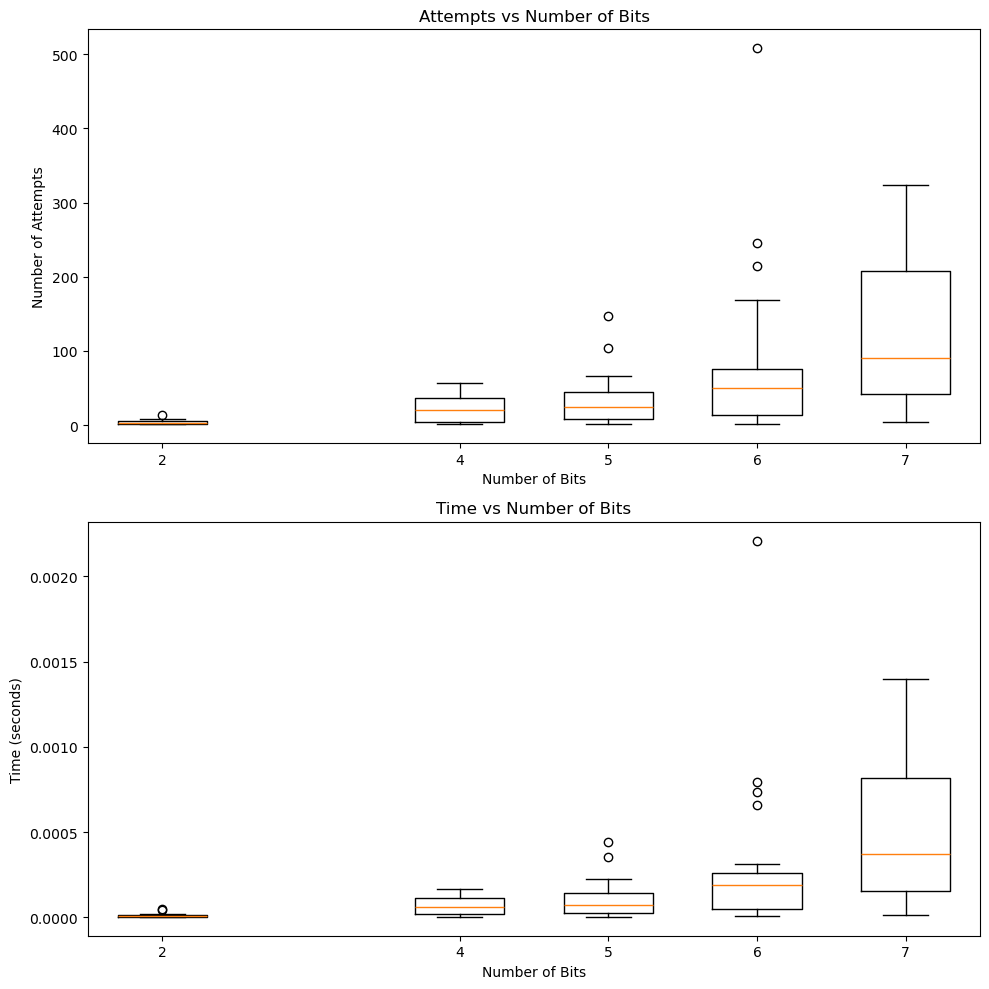

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

#random.seed(2)

class Game:
    def __init__(self, str_size):
        if str_size <= 0:
            raise ValueError("str_size must be a positive integer")
        self.str_size = str_size
        self.target_pattern = [random.choice((0,1)) for x in range(0,self.str_size)]

    def change_game_pattern(self):
        self.target_pattern = [random.choice((0,1)) for x in range(0,self.str_size)]

    def generate_random_bit_pattern(self):
        return [random.choice((0,1)) for x in range(0,self.str_size)]

    def is_correct_pattern(self, pattern):
        if len(pattern) != self.str_size:
            raise ValueError("Pattern size does not match the expected size")
        return pattern == self.target_pattern

    def calc_fitness(self, atual):
        if len(atual) != self.str_size:
            raise ValueError("Pattern size does not match the expected size")
        valor = 0
        for i in range(0,len(self.target_pattern)):
            if self.target_pattern[i] == atual[i]:
                valor += 1/len(self.target_pattern)
        
        return valor

    def mutate_pattern(self, pattern):
        if len(pattern) != self.str_size:
            print(pattern)
            print(self.target_pattern)
            raise ValueError("Pattern size does not match the expected size")

        position = random.randint(0, self.str_size - 1) # random position
        pattern[position] = 1 if pattern[position] == 0 else 0

        return pattern

def measure_performance_random_picks(str_size, num_trials=30):
    attempts = []
    times = []
    fitness_lista = []
    padrao_lista = []

    for nada in range(num_trials):
        game = Game(str_size)
        start_time = time.time()
        attempt_count = 0

        while True:
            pattern = game.generate_random_bit_pattern()
            fitness = game.calc_fitness(pattern)
            fitness_lista.append(fitness)
            attempt_count += 1
            if game.is_correct_pattern(pattern):
                break

        #print(fitness_lista)
        end_time = time.time()
        elapsed_time = end_time - start_time
        attempts.append(attempt_count)
        times.append(elapsed_time)

    return attempts, times

def only_better_fittness(str_size, max_iterations=1000): # Ex1 b)
    game = Game(str_size)
    current_pattern = game.generate_random_bit_pattern()
    print(f"Initial Pattern: {current_pattern}, Wanted Pattern: {game.target_pattern}")
    current_fitness = game.calc_fitness(current_pattern)
    iterations = 0

    for iteration in range(max_iterations):
        mutated_pattern = game.mutate_pattern(current_pattern)
        mutated_fitness = game.calc_fitness(mutated_pattern)

        if mutated_fitness > current_fitness:
            current_pattern = mutated_pattern
            current_fitness = mutated_fitness

        if game.is_correct_pattern(current_pattern):
            break
        iterations+=1

    print("Final Pattern:", current_pattern)
    print("Iterations:", iterations)

    return current_pattern, iteration + 1

def measure_performance_only_better_picks(str_size, num_trials=30):
    attempts = []
    times = []

    for _ in range(num_trials):
        game = Game(str_size)
        current_pattern = game.generate_random_bit_pattern()
        current_fitness = game.calc_fitness(current_pattern)
        attempt_count = 0
        start_time = time.time()

        while True:
            mutated_pattern = game.mutate_pattern(current_pattern)
            mutated_fitness = game.calc_fitness(mutated_pattern)
            attempt_count += 1

            # Accept only if the fitness improves
            if mutated_fitness > current_fitness:
                current_pattern = mutated_pattern
                current_fitness = mutated_fitness

            if game.is_correct_pattern(current_pattern):
                break

        end_time = time.time()
        elapsed_time = end_time - start_time
        attempts.append(attempt_count)
        times.append(elapsed_time)

    return attempts, times

def plot_performance(str_sizes, num_trials, performance_func):

    attempts_data = []
    times_data = []

    for str_size in str_sizes:
        attempts, times = performance_func(str_size, num_trials=30)
        attempts_data.append(attempts)
        times_data.append(times)

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Plot attempts
    axs[0].boxplot(attempts_data, positions=str_sizes, widths=0.6)
    axs[0].set_xlabel('Number of Bits')
    axs[0].set_ylabel('Number of Attempts')
    axs[0].set_title('Attempts vs Number of Bits')
    axs[0].set_xticks(str_sizes)

    # Plot times
    axs[1].boxplot(times_data, positions=str_sizes, widths=0.6)
    axs[1].set_xlabel('Number of Bits')
    axs[1].set_ylabel('Time (seconds)')
    axs[1].set_title('Time vs Number of Bits')
    axs[1].set_xticks(str_sizes)

    plt.tight_layout()

myGame = Game(6)
#myPattern = myGame.generate_random_bit_pattern()
#print(myPattern)
#print(myGame.mutate_pattern(myPattern))

print(f"(num_attempts, time) for str_size=4: {measure_performance_random_picks(str_size=4, num_trials=1)}")
print(f"(num_attempts, time) for str_size=6: {measure_performance_random_picks(str_size=6, num_trials=1)}")
print(f"(num_attempts, time) for str_size=8: {measure_performance_random_picks(str_size=8, num_trials=1)}")

str_sizes = [2, 4, 5, 6, 7] # for tests

# Ex 1 b)
for x in str_sizes:
    only_better_fittness(x)

# Define the pattern sizes to test#
# Plot the performance
plot_performance(str_sizes, num_trials=30, performance_func=measure_performance_random_picks)

plot_performance(str_sizes, num_trials=30, performance_func=measure_performance_only_better_picks) # Ex 1 b)

random.seed(2)
game = Game(16)
solucao = game.generate_random_bit_pattern()
top30 = [[]]
fitness = []

for i in range(0,100):
    numero = game.generate_random_bit_pattern()
    top30.append((numero,game.calc_fitness(numero)))

top30.pop(0)
top30.sort(key=lambda x: x[1], reverse=True)

top30 = top30[0:30]    

for i in range(0,70):
    numero = game.mutate_pattern(top30[random.randint(0,29)][0])
    top30.append((numero,game.calc_fitness(numero)))

print(top30)

In [ ]:
'''
random.seed(2)
inicio = time.time()
game = Game(16)
solucao = game.generate_random_bit_pattern()
top30 = [[]]

for i in range(0,100):
    numero = game.generate_random_bit_pattern()
    top30.append((numero,game.calc_fitness(numero)))

top30.pop(0)
top30.sort(key=lambda x: x[1], reverse=True)

iteracoes = 0

while(top30[0][1]!=1 or top30[0][1] != top30[1][1]):
    iteracoes +=1
    top30 = top30[0:30]

    for i in range(0,70):
        numero = game.mutate_pattern(top30[random.randint(0,29)][0])
        top30.append((numero,game.calc_fitness(numero)))
    top30.sort(key=lambda x: x[1], reverse=True)
fim = time.time()

print(fim - inicio)
print(top30)
print(iteracoes)
'''


random.seed(2)
num_bits = 16
inicio = time.time()
game = Game(num_bits)
solucao = game.generate_random_bit_pattern()
top30 = [[]]

for i in range(0,100):
    numero = game.generate_random_bit_pattern()
    top30.append((numero,game.calc_fitness(numero)))

top30.pop(0)
top30.sort(key=lambda x: x[1], reverse=True)

iteracoes = 0

while(top30[0][1]!=1 or top30[0][1] != top30[1][1]):
    iteracoes +=1
    top30 = top30[0:30]

    for i in range(0,70):
        divisao = random.randint(2,num_bits-3)
        numero = top30[random.randint(0,29)][0][0:divisao] + top30[random.randint(0,29)][0][divisao:]
        top30.append((numero,game.calc_fitness(numero)))
    top30.sort(key=lambda x: x[1], reverse=True)


print(top30)